Install R on Mac
---
1. install XQuartz-2.7.7.dmg, R and Anaconda;
2. Onced installed above, open terminal from [Applications $\to$ Utility]:
   > conda install -c r r-essentials
   
   and follow its suggestion to choose CRAN site and installed the necessary packages;
3. After above steps, startup up IPython notebook to do R on IPython.   


In [1]:
# function used to show the computing result
#    answer(expression,variable)
answer <- function(arg1,arg2){
    cat(sprintf(arg1,arg2))
}

Homework 3-1
---
Problem
---
According to the Behavioral Rist Factor Surveillance System, 58$\%$ of the Americans adhere to a sedantary lifestyle [12].


a. If you selected repeated samples of size twelve from the U.S. population., what would be the mean number of individuals per sample who do not exercise regularly? What would be the standard deviation?

b. Suppose that you select a sample of twelve individuals and find that ten of them do not exercise regularly. Assuming that the Surveillance System is correct, what is the probability that you would have obtained results as bad as or worse that those you observed?

Answer
---

From the problem, 
   $$p={\cal P}(\hbox{Having not exercised regularly})=0.58$$
a. If number of samples is $n=12$:
   - mean =$np=12\times0.58=6.96\sim7$<br>
   ,i.e. almost 7 persons do not exercise regularly.
   - stanard deviation = $\sqrt{np(1-p)}$ = 1.71   

In [38]:
# R-codes here
n <- 12
p <- 0.58
cat(sprintf("The mean of Binom(12,0.58) is np=%.3f\n",n*p))
cat(sprintf("The standard deviation of Binom(12,0.58) is %.3f",sqrt(n*p*(1-p))))

The mean of Binom(12,0.58) is np=6.960
The standard deviation of Binom(12,0.58) is 1.710

b.  Suppose that the $X$ is the r,v. ditributed as $Binomial(n=12,p=0.58)$.
    - The probability of ten of them do not exercise regularly is calculated as follows (this means, only two do exercise regularly):
$$ {\cal P}(X=10)=C^{12}_{10}\cdot 0.58^{10}(1-0.58)^{2}=0.0038$$
    - the probability that  results are as bad as or worse that those observed:
$$ {\cal P}(X\ge10)=\sum_{k=10}^{12} C^{12}_{k}\cdot 0.58^{k}(1-0.58)^{12-k}=0.0642$$

R-code
---
- dbinom(k,size=n,prob=b)= Probability of binomial r.v. (n,p) being k:
$$ {\cal P}(\text{Binom}(n,p)=k)=C^{n}_{k}\cdot p^k(1-p)^{n-k}$$

- To sum up the probability for r.v. during certain range, we use the "for"-loop as follows:
  ```C
  # set initial value of sum of probability to be zero
  ans1_b2<-0
  # sum up the probability from 10 to 12, ( c(10:12): 10,11,12)
  for (k in c(10:12)){
    ans1_b2<-ans1_b2+dbinom(k, size=n, prob=p)
    }
  ```
    

In [40]:
ans1_b1<-dbinom(10, size=n, prob=p)
cat(sprintf("The probability of ten persons exercising regularly =%.3f\n",ans1_b1))

The probability of ten persons exercising regularly =0.050


In [41]:
#ans1_b2<-dbinom(0, size=n, prob=p)+dbinom(1, size=n, prob=p)+dbinom(2, size=n, prob=p)
ans1_b2<-0
for (k in c(10:12)){
    ans1_b2<-ans1_b2+dbinom(k, size=n, prob=p)
    }
cat(sprintf("The probability of worse not better than observed =%.7f\n",ans1_b2))

The probability of worse not better than observed =0.0641984


In [43]:
sum(dbinom(10:12, size=n, prob=p))

[1] 0.06419844

Problem 3-2
---
The number of the cases of tetanus reported in the United States during a single month in 1989 has a Poisson distribution with parameter $\lambda=4.5$ [8].

a). What is the probability that exactly one case of tetanus will be reported during a giving month? 

b). What is the probability that at most two cases of tetanus will be reported? 

c). What is the probability that four or more cases of tetanus will be reported? 

d). What is the mean number of cases of tetanus reported in a one-month period? What is the standard deviation? 

Answer
---
Let $X$ be the Poisson r.v. with parameter $\lambda=4.5$ and its pmf is:
$$f_X(X=x|\lambda=4.5)=\frac{\lambda^x e^{-\lambda}}{x!},\hbox{ } x=0,1,2,\cdots$$

R-code
---
- dpois(k,lambda=$\lambda$) = Probability of Poisson r.v. $X_\lambda$ being $k$:
$$ {\cal P}(X_\lambda=k)=\frac{\lambda^k e^{-\lambda}}{k!}$$

Mean=Variance=$\lambda$    

##### a).  $${\cal P}(X=1)=f_X(X=1|\lambda=4.5)=\frac{4.5^1 e^{-4.5}}{1!}=0.050$$

In [5]:
ans3_2a<-dpois(1,lambda=4.5)
expr3_2a<-"The probability that exactly one case of tetanus is %0.4f"
answer(expr3_2a,ans3_2a)

The probability that exactly one case of tetanus is 0.0500

b). $${\cal P}(X\le2)=\frac{4.5^0 e^{-4.5}}{0!}+\frac{4.5^1 e^{-4.5}}{1!}+\frac{4.5^2 e^{-4.5}}{2!}= 0.1736$$

In [44]:
ans3_2b<-dpois(0,lambda=4.5)+dpois(1,lambda=4.5)+dpois(2,lambda=4.5)
# ans3_2b<-sum(dpois(0:2,lambda=4.5))
expr3_2b<-"The probability that at most two cases of tetanus is %0.4f"
answer(expr3_2b,ans3_2b)

The probability that at most two cases of tetanus is 0.1736

c). $${\cal P}(X\ge4)=1- {\cal P}(X\le3)=\sum\limits_{k=4}^\infty f_X(X=k|\lambda=4.5)=1-\sum\limits_{k=0}^3\frac{4.5^k e^{-4.5}}{k!}=0.6577$$

In [45]:
ans3_2c<-0
for (k in c(0:3)){
    ans3_2c<-ans3_2c+dpois(k,lambda=4.5)
    }
# ans3_2c <- 1-sum(dpois(0:3,lambda=4.5))
expr3_2c<-"The probability of which four or more cases of tetanus is %0.4f"
answer(expr3_2c,1-ans3_2c)

The probability of which four or more cases of tetanus is 0.6577

d). The mean of Poisson( $\lambda=4.5$ ) is $\lambda=4.5$ and standard deviation is $\sqrt\lambda=\sqrt {4.5}=2.121$.

In [8]:
l_mean <- 4.5
l_sd <- sqrt(4.5)
cat(sprintf(" The mean is %0.1f and standard deviation is %.3f",l_mean,l_sd))


 The mean is 4.5 and standard deviation is 2.121

Problem 3-3
---
Among females in the United States between 18 and 74 years of age, diastlic blood pressure is normally distributed with mean $\mu=77$ mm Hg and standard deviation $\sigma=11.6$ mm Hg [5].

a). What is the probability that a randomly selected woman has a diatolic blood pressure less than 60  mm Hg? 

b). What is the probability that she has a diatolic blood pressure greater than 90  mm Hg? 

c). What is the probability that the womean has adiatolic blood pressure between 60  and 90 mm Hg?

R-code
---
For $X=N(\mu,\sigma^2)$
- pnorm(x, mean = $\mu$, sd = $\sigma$) = the probability of the following:
$$ {\cal P}(X\le x)=\int^x_{-\infty}\frac{\exp[{-(t-\mu)^2/(2\sigma^2)}]}{\sqrt{2\pi}\sigma}d t$$

- Standard normalization for general Normal Distribution, $N(\mu,\sigma^2)$:
$$\frac{X-\mu}{\sigma}\sim Z= N(0,1)$$
since
\begin{eqnarray}
{\cal P}(X\le x)&=&\int^x_{-\infty}\frac{\exp[{-(t-\mu)^2/(2\sigma^2)}]}{\sqrt{2\pi}\sigma}d t\\
\left(z=(t-\mu)/\sigma\right)&=&\int^{(x-\mu)/\sigma}_{-\infty} \frac{\exp(-z^2/2)}{\sqrt{2\pi}}dz \\
&=&{\cal P}\left(Z\le \frac{x-\mu}{\sigma}\right)
\end{eqnarray}
 here, we also use the fact: $dz=dt/\sigma$ . 

Answer
---
Let $X$ be a $N(\mu, \sigma^2)$ r.v. with $\mu=77, \sigma^2=11.6^2$.

a). the probability that a randomly selected woman has a diatolic blood pressure less than 60 mm Hg is:
$${\cal P}(X\le60)={\cal P}\left(\frac{X-77}{11.6}\le\frac{60-77}{11.6}\right)={\cal P}(Z\le-1.466)=0.071$$

since 
 - $\frac{N(\mu,\sigma^2)-\mu}{\sigma}\sim N(0,1)=Z$
 - $$ F_Z(-1.466)={\cal P}(Z\le-1.466)=\int_{-\infty}^{-1.466}\frac{\exp(-t^2/2)d t}{\sqrt{2\pi}}=0.071$$

R-code
---
integrate(dnorm, -Inf, a) = ${\cal P}(Z\le a)=\int^a_{-\infty}\frac{\exp(-x^2/2)}{\sqrt{2\pi}}dx$

In [9]:
integrate(dnorm, -Inf, -1.466)

0.07132414 with absolute error < 1.1e-07

In [10]:
expr3_3a<-"The probability of having a diatolic blood pressure less than 60 mm Hg is %0.3f"
ans3_3a=pnorm(-1.466, mean = 0, sd = 1)
answer(expr3_3a,ans3_3a)


The probability of having a diatolic blood pressure less than 60 mm Hg is 0.071

b). the probability of a diatolic blood pressure greater than 90 mm Hg is:
$${\cal P}(X\ge90)={\cal P}\left(\frac{X-77}{11.6}\ge\frac{90-77}{11.6}\right)={\cal P}(Z\ge1.121)=0.131$$


In [48]:
expr3_3b<-"The probability of having a diatolic blood pressure more than 90 mm Hg is %0.3f"
ans3_3b=pnorm(-1.121, mean = 0, sd = 1)
answer(expr3_3b,ans3_3b)


The probability of having a diatolic blood pressure more than 90 mm Hg is 0.131

In [52]:
expr3_3b<-"The probability of having a diatolic blood pressure more than 90 mm Hg is %0.3f"
ans3_3b=pnorm(64, mean = 77, sd = 11.6)
answer(expr3_3b,ans3_3b)


The probability of having a diatolic blood pressure more than 90 mm Hg is 0.131

In [11]:
integrate(dnorm,1.121, Inf)

0.1311439 with absolute error < 3.8e-07

R-code
---
$X=N(\mu,\sigma^2)$, then

${\cal P}(X\le x)$ = pnorm(x, mean = $\mu$, sd = $\sigma$)

In [12]:
(90-77)/11.6

[1] 1.12069

Note
---

For standard Normal r.v., $Z$, we have the well result:
$${\cal P}(Z\ge x)={\cal P}(Z\le -x)$$
for any $x\in\ \mathbf{R}$

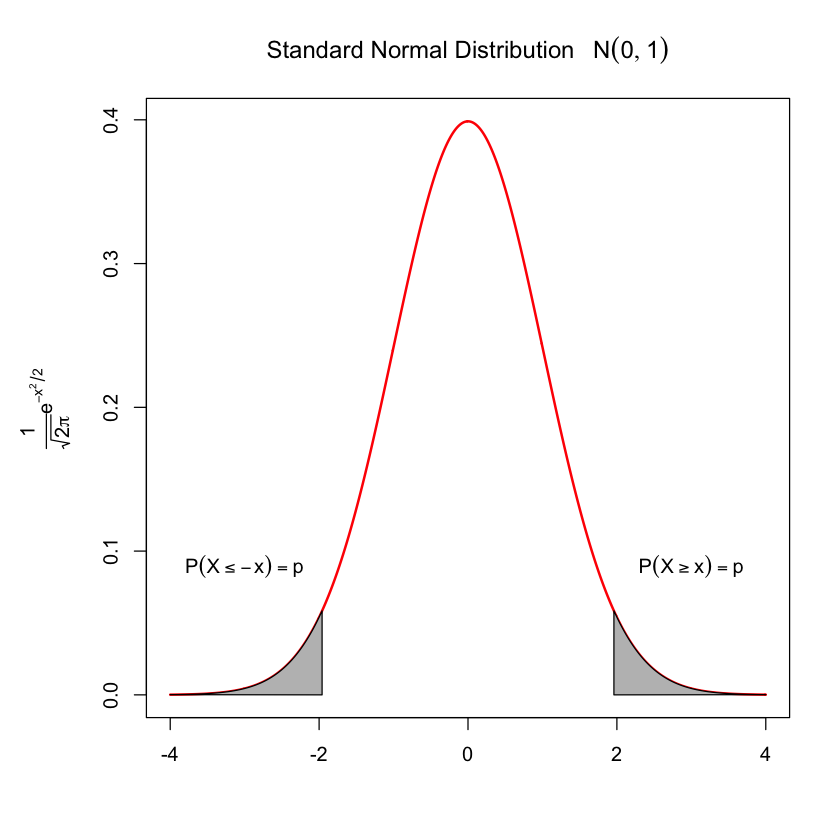

In [39]:
oldpar <- par(mar = c(5, 6, 4, 2) + 0.1) 
mu <- 0; sigma <- 1 
x <- seq(-4, 4, .01) 
fx <- (1/sqrt(2*pi*sigma^2))*exp(-(x-mu)^2/(2*sigma^2))
# same as fx <-dnorm(x)
plot(x, fx, type = "l", col='red',lwd = 2,xlab="",
        ylab=expression(frac(1,sqrt(2*pi))* e^{-x^2/2}),
     main=expression("Standard Normal Distribution "~~ N(0,1))) 

x0 <- x[x >= 1.96]    # define right region to fill
x0 <- c(x0[1], x0) ;  fx0 <- fx[x >= 1.96]
fx0 <- c(0, fx0)
text(3,0.09,expression(P(X>=x)==p))
polygon(x0, fx0, col="gray")

x1 <- x[x <= -1.96]    # define left region to fill
fx1 <- fx[x <= -1.96]
x1 <- c(x1,x1[length(x1)]) ;  #
fx1 <- c(fx1,0)
text(-3,0.09,expression(P(X<=-x)==p))
polygon(x1, fx1, col="gray")

In [13]:
expr3_3b<-"The probability of having a diatolic blood pressure greater than 90 mm Hg is %0.3f"
ans3_3b<-1-pnorm(1.121, mean = 0, sd = 1)
answer(expr3_3b,ans3_3b)


The probability of having a diatolic blood pressure greater than 90 mm Hg is 0.131

c). the probability of a diatolic blood pressure between 60 and 90 mm Hg is:
\begin{eqnarray}
   {\cal P}(60\le X\le90)&=&1-{\cal P}(X\ge90)-{\cal P}(X\le60)\\
                         &=&{\cal P}(X\le90)-{\cal P}(X\le60)\\
                    (\hbox{ or }  )   &=&{\cal P} \left(\frac{60-77}{11.6}\le Z=\frac{X-77}{11.6}
                                     \le\frac{90-77}{11.6}\right)\\
                         &=&{\cal P}(-1.466\le Z\le1.121)\\            
                         &=&{\cal P}(Z\le1.121)- {\cal P}(Z\le-1.466)\\
                         &=&0.798
\end{eqnarray}



In [14]:
integrate(dnorm,-1.466,1.121)

0.7975319 with absolute error < 8.9e-15

In [15]:
mu=77
sigma=11.6
cat(sprintf("For X being Normal r.v. with mean=%d and standard deviation=%.1f\n---\n",mu,sigma))
p90=pnorm(90,mean=mu,sd=sigma)
exp90="The probability of X less than 90 is %.3f \n"
answer(exp90,p90)
p60=pnorm(60,mean=mu,sd=sigma)
exp60="The probability of X less than 60 is %.3f\n"
answer(exp60,p60)
p6090=pnorm(90,mean=mu,sd=sigma)-pnorm(60,mean=mu,sd=sigma)
exp6090="The probability of X between 60 and 90 is %.3f\n"

answer(exp6090,p6090)


For X being Normal r.v. with mean=77 and standard deviation=11.6
---
The probability of X less than 90 is 0.869 
The probability of X less than 60 is 0.071
The probability of X between 60 and 90 is 0.797


In [16]:
# by P(X<90)-p(X<60)
expr3_3c<-"The probability of having a diatolic blood pressure between 60 and 90 mm Hg is %0.3f"
ans3_3c<-pnorm(1.121, mean = 0, sd = 1)-pnorm(-1.466, mean = 0, sd = 1)
answer(expr3_3c,ans3_3c)

The probability of having a diatolic blood pressure between 60 and 90 mm Hg is 0.798

Approximation of Binomial r.v.
---
For binomial r.v. $X$=Binom($n,p$):
- If $n\cdot p\sim \lambda$ where $\lambda$ is certain a constant, $X$ is distributed as Poisson($\lambda$).
- If mean of $X$, being $n \cdot p\ge5$, and variance , being $n \cdot p(1-p)\ge5$, $X$ is distributed as <br>Normal($\mu=np,\sigma^2=np(1-p))$  
- For integers, $m,n$, the range of approximated normal is used to be extended a little as follows:
$${\cal P}(m\le Binomial\le n)\sim {\cal P}(m-0.5< N(\mu,\sigma^2)<n+0.5)$$

￼自行練習
---

一地區居住 10,000 人, 若一個人在一年內被搶劫的機率為 0.0005, 則此地區一 年內共發生七件以上搶案的機率為?
上小題可以用常態分布來近似嗎? 可以的話, 求出此地區一年內共發生七件以 上搶案的機率。 若不可, 請說明原因。

In [17]:
n<-10000
p<-0.0005
answer("n*p is equal to %.2f\n",n*p)
answer("n*p*(1-p) is equal to %.4f",n*p*(1-p))

n*p is equal to 5.00
n*p*(1-p) is equal to 4.9975

$X$ is distributed as a Poisson($\lambda$) *r.v.* where $\lambda=\bar X=5$.
$${\cal P}(X\ge7)=1-\sum_{k=0}^6\frac{5^k\exp(-5)}{k!}=0.238$$

R_code
---
For Poisson r.v. with $\lambda=5$ and sum of events $X\ge7$:

${\cal P}(X\ge7)$ = 1 - sum(dpois(0:6, 5))

In [18]:
pPoisval<-1-sum(dpois(0:6, 5))
expr6 <- "The probability of cases more than 7 is %.3f."
answer(expr6,pPoisval)

The probability of cases more than 7 is 0.238.

Since the variance ($4.9975$) is smaller than 5 , it is not appropriate to use normal r.v. as simulation, the pdf of normal approximation is not coincided with one of original binomial, especially for small values, reference the following picture: 

However if we use stanard normal approximation, then 
\begin{eqnarray}
     {\cal P}(Binom\ge7)&=&{\cal P}(X\ge6.5)\\
     &=&{\cal P}\left(\frac{X-5}{\sqrt{4.9975}}\ge\frac{6.5-5}{\sqrt{4.9975}}=0.671\right)\\
                    &=&0.251
\end{eqnarray}
The error seems too large to accept.

In [54]:
p<-(6.5-5)/sqrt(4.9975)
pnormval<-1-pnorm(p,mean=0,sd=1)
pnormval
p

[1] 0.251114

[1] 0.6709882

Binomial 
---

$${\cal P}(X\ge7)=1-\sum_{k=0}^6{C^n_k}p^k(1-p)^{n-k}\sim0.238$$

R_codes
---
For binomial $Binom(n=10000,p=0.0005)$:

${\cal P}(X\le6)$ = sum(dbinom(0:6, 10000, 0.0005))

In [55]:
pbinomval<-1-sum(dbinom(0:6, 10000, 0.0005))

In [56]:
pPoisval<-1-sum(dpois(0:6, 5))
pPoisval

[1] 0.2378165

In [57]:
binomt<-"The probability by binomial distribution: %.3f\n"
answer(binomt,pbinomval)
poist<-"The probability by Poisson distribution: %.3f\n"
answer(poist,pPoisval)
normt<-"The probability by Normal distribution: %.3f\n"
answer(normt,pnormval)

The probability by binomial distribution: 0.238
The probability by Poisson distribution: 0.238
The probability by Normal distribution: 0.251


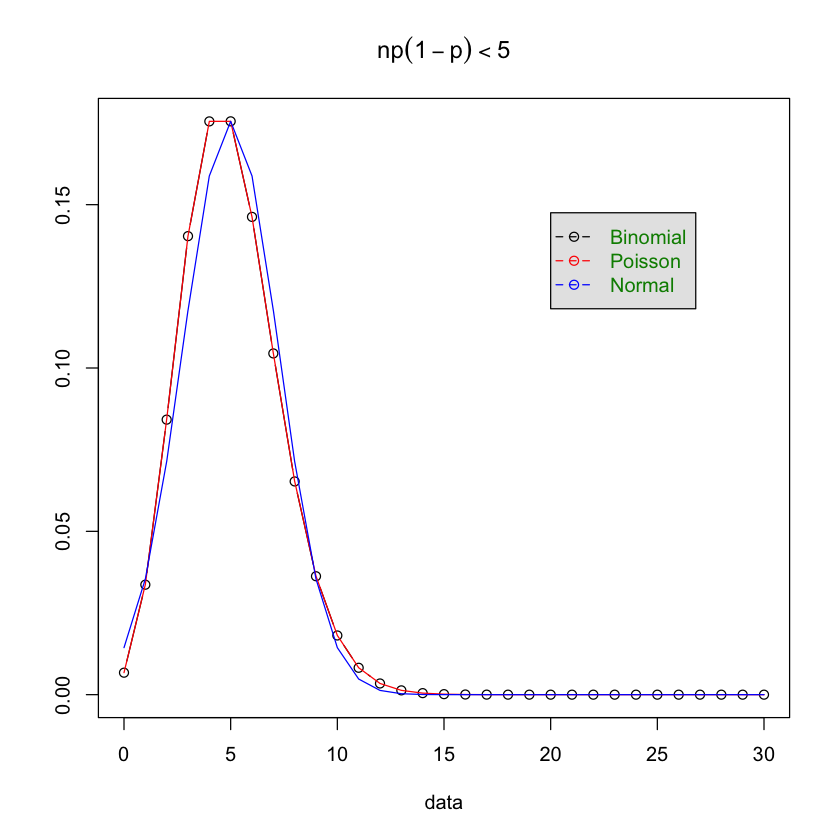

In [23]:
# Binomial(n=50,p=0.2)
n<-10000
p<-0.0005
x <- seq(0,30,by=1)
y <- dbinom(x,n,p)

plot(x,y,type="b",xlab="data",ylab="",main=expression(np(1-p)<5))
par(new=TRUE)
Poi<-dpois(x,lambda=n*p)
plot(x,Poi,type="l",col="red",xlab="",ylab="",,axes=FALSE) 
Z<-dnorm(x,mean=n*p,sd=sqrt(n*p*(1-p)))
par(new=TRUE)
plot(x,Z,type="l",col="blue",xlab="",ylab="",,axes=FALSE) 
legend(20, 0.15, c("Binomial", "Poisson", "Normal"), col = c(1, 2, 4),
       text.col = "green4", lty = c(2, 2, 2), pch = c(1, 1, 1),
       merge = TRUE, bg = "gray90")

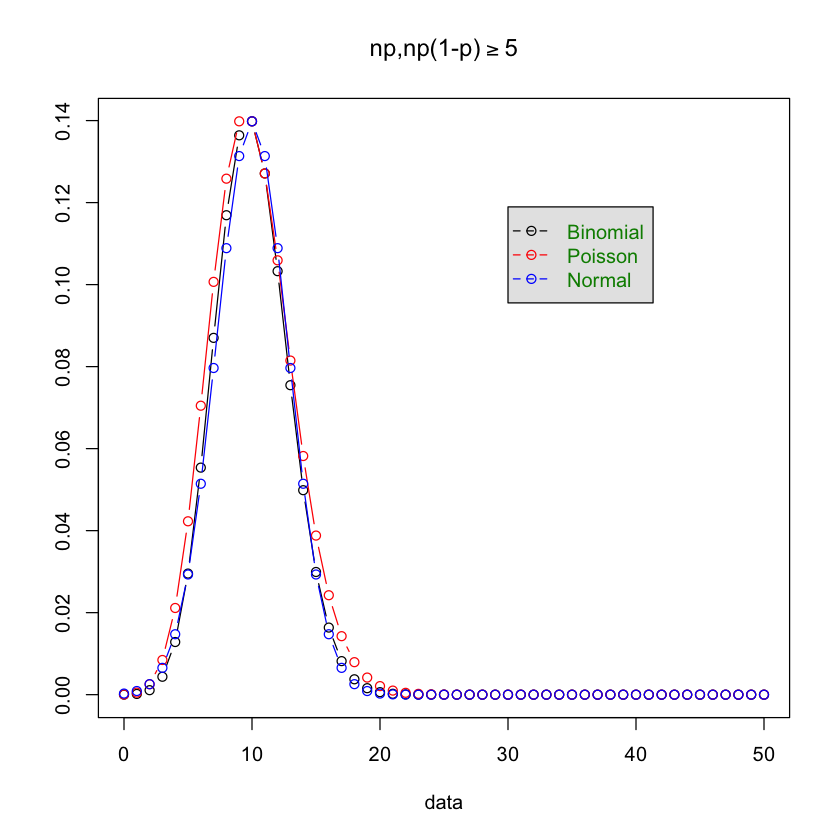

In [24]:
# Binomial(n=50,p=0.2)
n<-50
p<-0.2
x <- seq(0,n,by=1)
y <- dbinom(x,n,p)

plot(x,y,type="b",xlab="data",ylab="",main=expression("np,np(1-p)">=5))
par(new=TRUE)
Poi<-dpois(x,lambda=n*p)
plot(x,Poi,type="b",col="red",xlab="",ylab="",,axes=FALSE) 
Z<-dnorm(x,mean=n*p,sd=sqrt(n*p*(1-p)))
par(new=TRUE)
plot(x,Z,type="b",col="blue",xlab="",ylab="",,axes=FALSE) 
legend(30, 0.12, c("Binomial", "Poisson", "Normal"), col = c(1, 2, 4),
       text.col = "green4", lty = c(2, 2, 2), pch = c(1, 1, 1),
       merge = TRUE, bg = "gray90")

In [25]:
# How to save the generated picture

n<-100
p<-0.005
x <- seq(0,30,by=1)
y <- dbinom(x,n,p)

png(file="graphic.png",width=400,height=350)
plot(x,y,type="b",xlab="data",ylab="",main=expression(np<5,np(1-p)<5))
par(new=TRUE)
Poi<-dpois(x,lambda=n*p)
plot(x,Poi,type="l",col="red",xlab="",ylab="",,axes=FALSE) 
Z<-dnorm(x,mean=n*p,sd=sqrt(n*p*(1-p)))
par(new=TRUE)
plot(x,Z,type="l",col="blue",xlab="",ylab="",,axes=FALSE) 
legend(20, 0.4, c("Binomial", "Poisson", "Normal"), col = c(1, 2, 4),
       text.col = "green4", lty = c(2, 2, 2), pch = c(1, 1, 1),
       merge = TRUE, bg = "gray90")
dev.off()

pdf 
  2

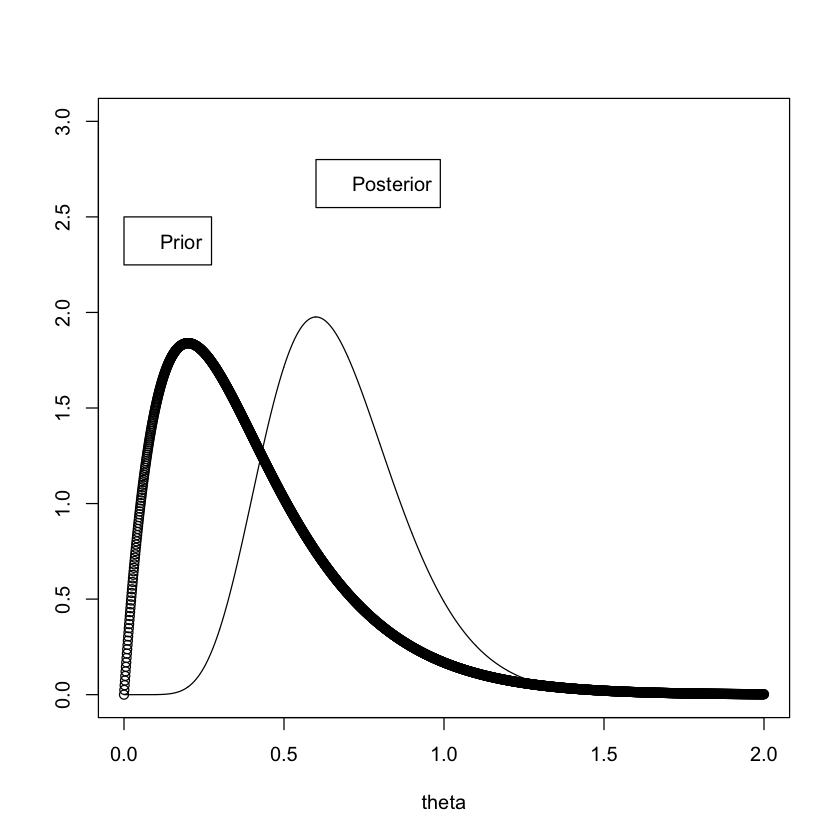

In [26]:

theta<-seq(0,2,0.001)
y<-dgamma(theta,2,5)
plot(theta,y,ylim=range(0:3),ylab="",xlab="theta")
y2<-dgamma(theta,10,15)
lines(theta,y2)
legend(0,2.5,"Prior")
legend(0.6,2.8,"Posterior")